- Made By:

          Ashmeet Kaur
  
            102203893
  
              3CO 30 (in Sem - 5)

Results of all the required scenarios (Accuracy, and Confusion Matrix)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Load the data

In [3]:
data = pd.read_csv('data.csv')

Split features and labels

In [5]:
y=data['label']
x=data.drop('label',axis=1)

Defining Parameters

In [7]:
k_values = [2, 4, 5, 6, 7, 10]
split_ratios = [(60, 40), (70, 30), (75, 25), (80, 20), (90, 10), (95, 5)]
results = []

Train the model and predict the values based on the given k values and Train - Test split ratios

In [9]:
for k in k_values:
    for train_size, test_size in split_ratios:
        # Train-test split
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size/100, random_state=42)
        
        # Train the model
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(x_train, y_train)
        
        # Predict
        y_pred = classifier.predict(x_test)
        
        # Evaluate
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        # Append results
        results.append((k, train_size, test_size, accuracy, cm))
        
        # Print results
        print(f"k: {k}, Train Size: {train_size}%, Test Size: {test_size}%")
        print(f"Accuracy: {accuracy}")
        print(f"Confusion Matrix:\n{cm}")
        print("\n")

k: 2, Train Size: 60%, Test Size: 40%
Accuracy: 0.9567261904761905
Confusion Matrix:
[[1621    0    1    0    0    0    4    0    0    0]
 [   0 1847    2    0    1    0    0    1    0    0]
 [  17   27 1627    3    2    2    0   12    3    1]
 [   2    9   17 1711    0   15    1    8    9    4]
 [   3   19    0    0 1587    0    3    3    0   18]
 [   5    5    1   56    5 1375   12    0    3    5]
 [  24    5    1    1    4    9 1650    0    0    0]
 [   1   27   12    0    6    1    0 1714    0   12]
 [  14   22   19   55    9   45    8    7 1450   10]
 [  11    8    2   19   50    6    1   55    4 1491]]


k: 2, Train Size: 70%, Test Size: 30%
Accuracy: 0.9600793650793651
Confusion Matrix:
[[1197    0    0    0    0    0    3    0    0    0]
 [   0 1387    1    0    1    0    0    0    0    0]
 [  15   20 1240    3    1    1    1   10    3    0]
 [   1    6   15 1305    0    9    1    6    9    3]
 [   2   12    0    0 1190    0    4    3    0   11]
 [   1    3    0   36    4 1031 

Save results to a DataFrame

In [10]:
results_df = pd.DataFrame(results, columns=['k', 'Train Size', 'Test Size', 'Accuracy', 'Confusion Matrix'])

Save results to CSV

In [11]:
results_df.to_csv('knn_results.csv', index=False)

Analysis regarding the dependency of the performance of model over training-testing split and k values

     k Train Size Test Size  Accuracy    
                                 mean std
0    2         60        40  0.956726 NaN
1    2         70        30  0.960079 NaN
2    2         75        25  0.961048 NaN
3    2         80        20  0.962143 NaN
4    2         90        10  0.963333 NaN
5    2         95         5  0.967619 NaN
6    4         60        40  0.961845 NaN
7    4         70        30  0.963175 NaN
8    4         75        25  0.964857 NaN
9    4         80        20  0.964405 NaN
10   4         90        10  0.965238 NaN
11   4         95         5  0.967143 NaN
12   5         60        40  0.961964 NaN
13   5         70        30  0.965556 NaN
14   5         75        25  0.966667 NaN
15   5         80        20  0.964881 NaN
16   5         90        10  0.965476 NaN
17   5         95         5  0.967143 NaN
18   6         60        40  0.959821 NaN
19   6         70        30  0.962540 NaN
20   6         75        25  0.964667 NaN
21   6         80        20  0.963

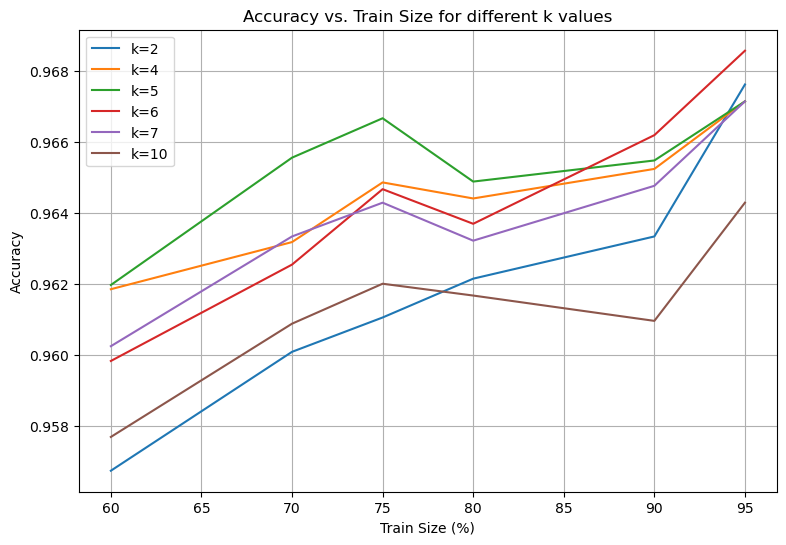

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the results from CSV
results_df = pd.read_csv('knn_results.csv')

# Create a Summary Table
summary_table = results_df.groupby(['k', 'Train Size', 'Test Size']).agg({
    'Accuracy': ['mean', 'std']
}).reset_index()
print(summary_table)

# Plot Accuracy vs. Train Size for different k values
plt.figure(figsize=(9, 6))
for k in results_df['k'].unique():
    subset = results_df[results_df['k'] == k]
    plt.plot(subset['Train Size'], subset['Accuracy'], label=f'k={k}')

plt.xlabel('Train Size (%)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Train Size for different k values')
plt.legend()
plt.grid(True)
plt.savefig('accuracy_vs_train_size.png')
plt.show()
